In [4]:
#import nltk
#nltk.download('all')

In [5]:
# import libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# download nltk corpus (first time only)
import nltk
nltk.download('vader_lexicon')      # Untuk analisis sentimen
nltk.download('stopwords')          # Untuk stopwords
nltk.download('punkt')              # Untuk tokenisasi
nltk.download('wordnet')            # Untuk lemmatizer

# Load the amazon review dataset
df = pd.read_csv("C:/Users/ACER/Downloads/sample_dataset_text_mining.csv")
df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,thanks..... .................................,4,elektronik,Rexco 18 Contact Cleaner / Pembersih Komponen ...,184464874,29,2100844,https://www.tokopedia.com/miniperkakas/rexco-1...
1,oke barang sudah di terima dengan baik...,4,elektronik,Alfalink EI 428 - Kamus Elektronik Electronic ...,24896339,283,588756,https://www.tokopedia.com/omegaelectronic/alfa...
2,"brg udh dtg #pontianak dgn slmat gan, mksih..",5,elektronik,Alfalink EI 212 - Kamus Elektronik,20602038,383,588756,https://www.tokopedia.com/omegaelectronic/alfa...
3,Cepat dan tepat! Recommended seller,5,elektronik,TI-84 Plus CE,38187136,53,844505,https://www.tokopedia.com/datasempoa/ti-84-plu...
4,"mantaf,. langsung test.. residu hilang\nkirima...",4,elektronik,Rexco 18 Contact Cleaner / Pembersih Komponen ...,184464874,29,2100844,https://www.tokopedia.com/miniperkakas/rexco-1...
...,...,...,...,...,...,...,...,...
4995,Trims gan paket telah di terima .,4,pertukangan,Staples Gun Tacker Mollar 3 in 1 / Staple Jok ...,221298191,408,1114588,https://www.tokopedia.com/indahjayatools/stapl...
4996,terimakasih pengiriman cepat.....................,5,pertukangan,staples tembak HOMASTER / steples tembak / sta...,89084141,363,1102298,https://www.tokopedia.com/cahayabelawa/staples...
4997,terima kasih n maaf baru konfirmasi..,5,pertukangan,staples tembak homaster / staple gun,8054645,56,296522,https://www.tokopedia.com/belawashop/staples-t...
4998,Terima kasih packing rapi,4,pertukangan,staples tembak staple gun tacker staples jok m...,245831770,68,231740,https://www.tokopedia.com/rumahbajukita/staple...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          5000 non-null   object
 1   rating        5000 non-null   int64 
 2   category      5000 non-null   object
 3   product_name  5000 non-null   object
 4   product_id    5000 non-null   int64 
 5   sold          5000 non-null   object
 6   shop_id       5000 non-null   int64 
 7   product_url   5000 non-null   object
dtypes: int64(3), object(5)
memory usage: 312.6+ KB


In [7]:
data = df[['product_name', 'text', 'category' ,'sold', 'rating']]
data.head()

,product_name,text,category,sold,rating
0,Rexco 18 Contact Cleaner / Pembersih Komponen ...,thanks..... .................................,elektronik,29,4
1,Alfalink EI 428 - Kamus Elektronik Electronic ...,oke barang sudah di terima dengan baik...,elektronik,283,4
2,Alfalink EI 212 - Kamus Elektronik,"brg udh dtg #pontianak dgn slmat gan, mksih..",elektronik,383,5
3,TI-84 Plus CE,Cepat dan tepat! Recommended seller,elektronik,53,5
4,Rexco 18 Contact Cleaner / Pembersih Komponen ...,"mantaf,. langsung test.. residu hilang\nkirima...",elektronik,29,4


In [8]:
data

,product_name,text,category,sold,rating
0,Rexco 18 Contact Cleaner / Pembersih Komponen ...,thanks..... .................................,elektronik,29,4
1,Alfalink EI 428 - Kamus Elektronik Electronic ...,oke barang sudah di terima dengan baik...,elektronik,283,4
2,Alfalink EI 212 - Kamus Elektronik,"brg udh dtg #pontianak dgn slmat gan, mksih..",elektronik,383,5
3,TI-84 Plus CE,Cepat dan tepat! Recommended seller,elektronik,53,5
4,Rexco 18 Contact Cleaner / Pembersih Komponen ...,"mantaf,. langsung test.. residu hilang\nkirima...",elektronik,29,4
...,...,...,...,...,...
4995,Staples Gun Tacker Mollar 3 in 1 / Staple Jok ...,Trims gan paket telah di terima .,pertukangan,408,4
4996,staples tembak HOMASTER / steples tembak / sta...,terimakasih pengiriman cepat.....................,pertukangan,363,5
4997,staples tembak homaster / staple gun,terima kasih n maaf baru konfirmasi..,pertukangan,56,5
4998,staples tembak staple gun tacker staples jok m...,Terima kasih packing rapi,pertukangan,68,4


In [9]:
data['text'] = data['text'].astype(str)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9264\2505709679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].astype(str)


In [10]:
data['text'] = data['text'].str.lower()
data

C:\Users\ACER\AppData\Local\Temp\ipykernel_9264\3512296839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].str.lower()


,product_name,text,category,sold,rating
0,Rexco 18 Contact Cleaner / Pembersih Komponen ...,thanks..... .................................,elektronik,29,4
1,Alfalink EI 428 - Kamus Elektronik Electronic ...,oke barang sudah di terima dengan baik...,elektronik,283,4
2,Alfalink EI 212 - Kamus Elektronik,"brg udh dtg #pontianak dgn slmat gan, mksih..",elektronik,383,5
3,TI-84 Plus CE,cepat dan tepat! recommended seller,elektronik,53,5
4,Rexco 18 Contact Cleaner / Pembersih Komponen ...,"mantaf,. langsung test.. residu hilang\nkirima...",elektronik,29,4
...,...,...,...,...,...
4995,Staples Gun Tacker Mollar 3 in 1 / Staple Jok ...,trims gan paket telah di terima .,pertukangan,408,4
4996,staples tembak HOMASTER / steples tembak / sta...,terimakasih pengiriman cepat.....................,pertukangan,363,5
4997,staples tembak homaster / staple gun,terima kasih n maaf baru konfirmasi..,pertukangan,56,5
4998,staples tembak staple gun tacker staples jok m...,terima kasih packing rapi,pertukangan,68,4


In [11]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
data['text'] = data['text'].apply(remove_links)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9264\3655411865.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(remove_links)


In [12]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

data['text'] = data['text'].apply(remove_number)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9264\1225472380.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(remove_number)


In [13]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data['text'] = data['text'].apply(remove_punctuation)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9264\3814708372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(remove_punctuation)


In [14]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

data['text'] = data['text'].apply(remove_singl_char)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9264\195439617.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(remove_singl_char)


In [15]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['text_tokenize'] = data['text'].apply(word_tokenize_wrapper)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9264\1564876533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_tokenize'] = data['text'].apply(word_tokenize_wrapper)


In [16]:
data

,product_name,text,category,sold,rating,text_tokenize
0,Rexco 18 Contact Cleaner / Pembersih Komponen ...,thanks,elektronik,29,4,[thanks]
1,Alfalink EI 428 - Kamus Elektronik Electronic ...,oke barang sudah di terima dengan baik,elektronik,283,4,"[oke, barang, sudah, di, terima, dengan, baik]"
2,Alfalink EI 212 - Kamus Elektronik,brg udh dtg dgn slmat gan mksih,elektronik,383,5,"[brg, udh, dtg, dgn, slmat, gan, mksih]"
3,TI-84 Plus CE,cepat dan tepat recommended seller,elektronik,53,5,"[cepat, dan, tepat, recommended, seller]"
4,Rexco 18 Contact Cleaner / Pembersih Komponen ...,mantaf langsung test residu hilang kiriman aga...,elektronik,29,4,"[mantaf, langsung, test, residu, hilang, kirim..."
...,...,...,...,...,...,...
4995,Staples Gun Tacker Mollar 3 in 1 / Staple Jok ...,trims gan paket telah di terima,pertukangan,408,4,"[trims, gan, paket, telah, di, terima]"
4996,staples tembak HOMASTER / steples tembak / sta...,terimakasih pengiriman cepatdan barang sesuai,pertukangan,363,5,"[terimakasih, pengiriman, cepatdan, barang, se..."
4997,staples tembak homaster / staple gun,terima kasih maaf baru konfirmasi,pertukangan,56,5,"[terima, kasih, maaf, baru, konfirmasi]"
4998,staples tembak staple gun tacker staples jok m...,terima kasih packing rapi,pertukangan,68,4,"[terima, kasih, packing, rapi]"


In [19]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

text_fqsist = data['text_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(text_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0                                        [(thanks, 1)]
1    [(oke, 1), (barang, 1), (sudah, 1), (di, 1), (...
2    [(brg, 1), (udh, 1), (dtg, 1), (dgn, 1), (slma...
3    [(cepat, 1), (dan, 1), (tepat, 1), (recommende...
4    [(mantaf, 1), (langsung, 1), (test, 1), (resid...
Name: text_tokenize, dtype: object


In [20]:
slank_word_dict = {
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [22]:
normalizad_word = pd.read_csv("C:/Users/ACER/Downloads/colloquial-indonesian-lexicon.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

C:\Users\ACER\AppData\Local\Temp\ipykernel_9264\3057065997.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalizad_word_dict:
C:\Users\ACER\AppData\Local\Temp\ipykernel_9264\3057065997.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict[row[0]] = row[1]


In [25]:
data['text_normalized'] = data['text_tokenize'].apply(normalized_term).apply(slank_normalized_term)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9264\2287734254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_normalized'] = data['text_tokenize'].apply(normalized_term).apply(slank_normalized_term)


0                                                [thanks]
1          [oke, barang, sudah, di, terima, dengan, baik]
2       [bareng, sudah, datang, dengan, selamat, gan, ...
3                [cepat, dan, tepat, rekomendasi, seller]
4       [mantaf, langsung, test, residu, hilang, kirim...
                              ...                        
4995        [terima kasih, gan, paket, telah, di, terima]
4996    [terimakasih, pengiriman, cepatdan, barang, se...
4997              [terima, kasih, maaf, baru, konfirmasi]
4998                       [terima, kasih, packing, rapi]
4999    [mantap, gan, cepat, banget, kemarin, trf, sek...
Name: text_normalized, Length: 5000, dtype: object

In [26]:
data

,product_name,text,category,sold,rating,text_tokenize,text_normalized
0,Rexco 18 Contact Cleaner / Pembersih Komponen ...,thanks,elektronik,29,4,[thanks],[thanks]
1,Alfalink EI 428 - Kamus Elektronik Electronic ...,oke barang sudah di terima dengan baik,elektronik,283,4,"[oke, barang, sudah, di, terima, dengan, baik]","[oke, barang, sudah, di, terima, dengan, baik]"
2,Alfalink EI 212 - Kamus Elektronik,brg udh dtg dgn slmat gan mksih,elektronik,383,5,"[brg, udh, dtg, dgn, slmat, gan, mksih]","[bareng, sudah, datang, dengan, selamat, gan, ..."
3,TI-84 Plus CE,cepat dan tepat recommended seller,elektronik,53,5,"[cepat, dan, tepat, recommended, seller]","[cepat, dan, tepat, rekomendasi, seller]"
4,Rexco 18 Contact Cleaner / Pembersih Komponen ...,mantaf langsung test residu hilang kiriman aga...,elektronik,29,4,"[mantaf, langsung, test, residu, hilang, kirim...","[mantaf, langsung, test, residu, hilang, kirim..."
...,...,...,...,...,...,...,...
4995,Staples Gun Tacker Mollar 3 in 1 / Staple Jok ...,trims gan paket telah di terima,pertukangan,408,4,"[trims, gan, paket, telah, di, terima]","[terima kasih, gan, paket, telah, di, terima]"
4996,staples tembak HOMASTER / steples tembak / sta...,terimakasih pengiriman cepatdan barang sesuai,pertukangan,363,5,"[terimakasih, pengiriman, cepatdan, barang, se...","[terimakasih, pengiriman, cepatdan, barang, se..."
4997,staples tembak homaster / staple gun,terima kasih maaf baru konfirmasi,pertukangan,56,5,"[terima, kasih, maaf, baru, konfirmasi]","[terima, kasih, maaf, baru, konfirmasi]"
4998,staples tembak staple gun tacker staples jok m...,terima kasih packing rapi,pertukangan,68,4,"[terima, kasih, packing, rapi]","[terima, kasih, packing, rapi]"


In [18]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')

In [27]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data['text_stop_removed'] = data['text_normalized'].apply(stopwords_removal) 

In [28]:
data

,product_name,text,category,sold,rating,text_tokenize,text_normalized,text_stop_removed
0,Rexco 18 Contact Cleaner / Pembersih Komponen ...,thanks,elektronik,29,4,[thanks],[thanks],[thanks]
1,Alfalink EI 428 - Kamus Elektronik Electronic ...,oke barang sudah di terima dengan baik,elektronik,283,4,"[oke, barang, sudah, di, terima, dengan, baik]","[oke, barang, sudah, di, terima, dengan, baik]","[oke, barang, terima]"
2,Alfalink EI 212 - Kamus Elektronik,brg udh dtg dgn slmat gan mksih,elektronik,383,5,"[brg, udh, dtg, dgn, slmat, gan, mksih]","[bareng, sudah, datang, dengan, selamat, gan, ...","[bareng, selamat, gan, terima kasih]"
3,TI-84 Plus CE,cepat dan tepat recommended seller,elektronik,53,5,"[cepat, dan, tepat, recommended, seller]","[cepat, dan, tepat, rekomendasi, seller]","[cepat, rekomendasi, seller]"
4,Rexco 18 Contact Cleaner / Pembersih Komponen ...,mantaf langsung test residu hilang kiriman aga...,elektronik,29,4,"[mantaf, langsung, test, residu, hilang, kirim...","[mantaf, langsung, test, residu, hilang, kirim...","[mantaf, langsung, test, residu, hilang, kirim..."
...,...,...,...,...,...,...,...,...
4995,Staples Gun Tacker Mollar 3 in 1 / Staple Jok ...,trims gan paket telah di terima,pertukangan,408,4,"[trims, gan, paket, telah, di, terima]","[terima kasih, gan, paket, telah, di, terima]","[terima kasih, gan, paket, terima]"
4996,staples tembak HOMASTER / steples tembak / sta...,terimakasih pengiriman cepatdan barang sesuai,pertukangan,363,5,"[terimakasih, pengiriman, cepatdan, barang, se...","[terimakasih, pengiriman, cepatdan, barang, se...","[terimakasih, pengiriman, cepatdan, barang, se..."
4997,staples tembak homaster / staple gun,terima kasih maaf baru konfirmasi,pertukangan,56,5,"[terima, kasih, maaf, baru, konfirmasi]","[terima, kasih, maaf, baru, konfirmasi]","[terima, kasih, maaf, konfirmasi]"
4998,staples tembak staple gun tacker staples jok m...,terima kasih packing rapi,pertukangan,68,4,"[terima, kasih, packing, rapi]","[terima, kasih, packing, rapi]","[terima, kasih, packing, rapi]"


In [29]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data['text_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['text_Stemmed'] = data['text_stop_removed'].swifter.apply(get_stemmed_term)

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


4243
------------------------
thanks : thanks
oke : oke
barang : barang
terima : terima
bareng : bareng
selamat : selamat
gan : gan
terima kasih : terima kasih
cepat : cepat
rekomendasi : rekomendasi
seller : seller
mantaf : mantaf
langsung : langsung
test : test
residu : residu
hilang : hilang
kiriman : kirim
lambat : lambat
yes : yes
esok : esok
ov : ov
cepst : cepst
paking : paking
bsgus : bsgus
bagus : bagus
semoga : moga
laku : laku
jual : jual
tolong : tolong
pengiriman : kirim
pos : pos
paket : paket
diterima : terima
terimakasih : terimakasih
trimakasaih : trimakasaih
sesuai : sesuai
harapan : harap
product : product
sesuaii : sesuai
cepatt : cepatt
thank : thank
you : you
mantaaaappp : mantaaaappp
nota : nota
produknya : produk
disayangkan : sayang
system : system
go : go
send : send
trouble : trouble
jam : jam
tibanya : tiba
mengecewakan : kecewa
harga : harga
ok : ok
barnag : barnag
respon : respon
alfalinknya : alfalinknya
kecilimut : kecilimut
mantab : mantab
barangnya : b

Pandas Apply: 100%|██████████| 5000/5000 [00:00<00:00, 18753.84it/s]


In [30]:
data

,product_name,text,category,sold,rating,text_tokenize,text_normalized,text_stop_removed,text_Stemmed
0,Rexco 18 Contact Cleaner / Pembersih Komponen ...,thanks,elektronik,29,4,[thanks],[thanks],[thanks],[thanks]
1,Alfalink EI 428 - Kamus Elektronik Electronic ...,oke barang sudah di terima dengan baik,elektronik,283,4,"[oke, barang, sudah, di, terima, dengan, baik]","[oke, barang, sudah, di, terima, dengan, baik]","[oke, barang, terima]","[oke, barang, terima]"
2,Alfalink EI 212 - Kamus Elektronik,brg udh dtg dgn slmat gan mksih,elektronik,383,5,"[brg, udh, dtg, dgn, slmat, gan, mksih]","[bareng, sudah, datang, dengan, selamat, gan, ...","[bareng, selamat, gan, terima kasih]","[bareng, selamat, gan, terima kasih]"
3,TI-84 Plus CE,cepat dan tepat recommended seller,elektronik,53,5,"[cepat, dan, tepat, recommended, seller]","[cepat, dan, tepat, rekomendasi, seller]","[cepat, rekomendasi, seller]","[cepat, rekomendasi, seller]"
4,Rexco 18 Contact Cleaner / Pembersih Komponen ...,mantaf langsung test residu hilang kiriman aga...,elektronik,29,4,"[mantaf, langsung, test, residu, hilang, kirim...","[mantaf, langsung, test, residu, hilang, kirim...","[mantaf, langsung, test, residu, hilang, kirim...","[mantaf, langsung, test, residu, hilang, kirim..."
...,...,...,...,...,...,...,...,...,...
4995,Staples Gun Tacker Mollar 3 in 1 / Staple Jok ...,trims gan paket telah di terima,pertukangan,408,4,"[trims, gan, paket, telah, di, terima]","[terima kasih, gan, paket, telah, di, terima]","[terima kasih, gan, paket, terima]","[terima kasih, gan, paket, terima]"
4996,staples tembak HOMASTER / steples tembak / sta...,terimakasih pengiriman cepatdan barang sesuai,pertukangan,363,5,"[terimakasih, pengiriman, cepatdan, barang, se...","[terimakasih, pengiriman, cepatdan, barang, se...","[terimakasih, pengiriman, cepatdan, barang, se...","[terimakasih, kirim, cepatdan, barang, sesuai]"
4997,staples tembak homaster / staple gun,terima kasih maaf baru konfirmasi,pertukangan,56,5,"[terima, kasih, maaf, baru, konfirmasi]","[terima, kasih, maaf, baru, konfirmasi]","[terima, kasih, maaf, konfirmasi]","[terima, kasih, maaf, konfirmasi]"
4998,staples tembak staple gun tacker staples jok m...,terima kasih packing rapi,pertukangan,68,4,"[terima, kasih, packing, rapi]","[terima, kasih, packing, rapi]","[terima, kasih, packing, rapi]","[terima, kasih, packing, rapi]"


In [31]:
data["text_clean"] = [' '.join(map(str, l)) for l in data['text_Stemmed']]

In [32]:
data

,product_name,text,category,sold,rating,text_tokenize,text_normalized,text_stop_removed,text_Stemmed,text_clean
0,Rexco 18 Contact Cleaner / Pembersih Komponen ...,thanks,elektronik,29,4,[thanks],[thanks],[thanks],[thanks],thanks
1,Alfalink EI 428 - Kamus Elektronik Electronic ...,oke barang sudah di terima dengan baik,elektronik,283,4,"[oke, barang, sudah, di, terima, dengan, baik]","[oke, barang, sudah, di, terima, dengan, baik]","[oke, barang, terima]","[oke, barang, terima]",oke barang terima
2,Alfalink EI 212 - Kamus Elektronik,brg udh dtg dgn slmat gan mksih,elektronik,383,5,"[brg, udh, dtg, dgn, slmat, gan, mksih]","[bareng, sudah, datang, dengan, selamat, gan, ...","[bareng, selamat, gan, terima kasih]","[bareng, selamat, gan, terima kasih]",bareng selamat gan terima kasih
3,TI-84 Plus CE,cepat dan tepat recommended seller,elektronik,53,5,"[cepat, dan, tepat, recommended, seller]","[cepat, dan, tepat, rekomendasi, seller]","[cepat, rekomendasi, seller]","[cepat, rekomendasi, seller]",cepat rekomendasi seller
4,Rexco 18 Contact Cleaner / Pembersih Komponen ...,mantaf langsung test residu hilang kiriman aga...,elektronik,29,4,"[mantaf, langsung, test, residu, hilang, kirim...","[mantaf, langsung, test, residu, hilang, kirim...","[mantaf, langsung, test, residu, hilang, kirim...","[mantaf, langsung, test, residu, hilang, kirim...",mantaf langsung test residu hilang kirim lamba...
...,...,...,...,...,...,...,...,...,...,...
4995,Staples Gun Tacker Mollar 3 in 1 / Staple Jok ...,trims gan paket telah di terima,pertukangan,408,4,"[trims, gan, paket, telah, di, terima]","[terima kasih, gan, paket, telah, di, terima]","[terima kasih, gan, paket, terima]","[terima kasih, gan, paket, terima]",terima kasih gan paket terima
4996,staples tembak HOMASTER / steples tembak / sta...,terimakasih pengiriman cepatdan barang sesuai,pertukangan,363,5,"[terimakasih, pengiriman, cepatdan, barang, se...","[terimakasih, pengiriman, cepatdan, barang, se...","[terimakasih, pengiriman, cepatdan, barang, se...","[terimakasih, kirim, cepatdan, barang, sesuai]",terimakasih kirim cepatdan barang sesuai
4997,staples tembak homaster / staple gun,terima kasih maaf baru konfirmasi,pertukangan,56,5,"[terima, kasih, maaf, baru, konfirmasi]","[terima, kasih, maaf, baru, konfirmasi]","[terima, kasih, maaf, konfirmasi]","[terima, kasih, maaf, konfirmasi]",terima kasih maaf konfirmasi
4998,staples tembak staple gun tacker staples jok m...,terima kasih packing rapi,pertukangan,68,4,"[terima, kasih, packing, rapi]","[terima, kasih, packing, rapi]","[terima, kasih, packing, rapi]","[terima, kasih, packing, rapi]",terima kasih packing rapi


In [33]:
ulasan = ' '.join(str(v) for v in data['text_clean'])

In [34]:
tokenize_ulasan = word_tokenize(ulasan)

In [35]:
tokenize_ulasan

['thanks',
 'oke',
 'barang',
 'terima',
 'bareng',
 'selamat',
 'gan',
 'terima',
 'kasih',
 'cepat',
 'rekomendasi',
 'seller',
 'mantaf',
 'langsung',
 'test',
 'residu',
 'hilang',
 'kirim',
 'lambat',
 'yes',
 'esok',
 'ov',
 'barang',
 'cepst',
 'paking',
 'bsgus',
 'barang',
 'bagus',
 'moga',
 'laku',
 'jual',
 'tolong',
 'kirim',
 'pos',
 'paket',
 'terima',
 'terimakasih',
 'terima',
 'gan',
 'trimakasaih',
 'sesuai',
 'harap',
 'product',
 'sesuai',
 'kirim',
 'cepatt',
 'thank',
 'you',
 'bagus',
 'mantaaaappp',
 'gan',
 'rekomendasi',
 'seller',
 'barang',
 'terima',
 'nota',
 'bagus',
 'produk',
 'sayang',
 'system',
 'kirim',
 'go',
 'send',
 'trouble',
 'barang',
 'jam',
 'jam',
 'tiba',
 'kecewa',
 'harga',
 'ok',
 'barnag',
 'ok',
 'seller',
 'respon',
 'cepat',
 'alfalinknya',
 'kecilimut',
 'kirim',
 'cepat',
 'mantab',
 'barang',
 'barang',
 'bagus',
 'murah',
 'cepat',
 'barang',
 'terima',
 'terima',
 'kasih',
 'barang',
 'selamat',
 'kwalitas',
 'oke',
 'paket',

In [36]:
fqdist = FreqDist(tokenize_ulasan)

In [37]:
fqdist

FreqDist({'barang': 2191, 'sesuai': 1455, 'terima': 1188, 'cepat': 1102, 'bagus': 924, 'kasih': 727, 'kirim': 697, 'gan': 460, 'pesan': 447, 'respon': 431, ...})

In [38]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('barang', 2191),
 ('sesuai', 1455),
 ('terima', 1188),
 ('cepat', 1102),
 ('bagus', 924),
 ('kasih', 727),
 ('kirim', 697),
 ('gan', 460),
 ('pesan', 447),
 ('respon', 431),
 ('mantap', 376),
 ('produk', 363),
 ('seller', 361),
 ('deskripsi', 312),
 ('rapi', 308)]

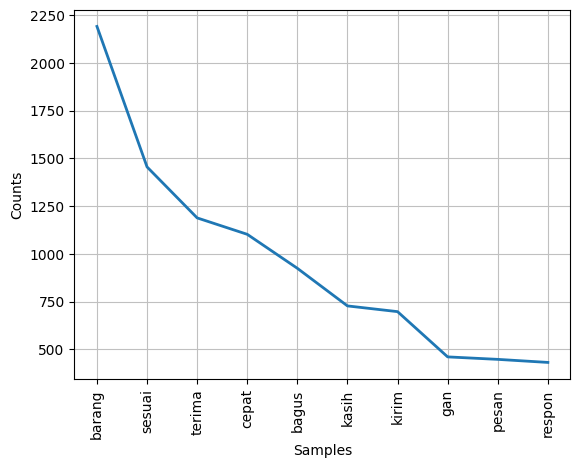

In [39]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [40]:
data.to_excel("tokped_text.xlsx")

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
data = pd.read_excel("C:/Users/ACER/Downloads/tokped_text.xlsx", index_col=0)
data.head()

,product_name,text,category,sold,rating,text_tokenize,text_normalized,text_stop_removed,text_Stemmed,text_clean
0,Rexco 18 Contact Cleaner / Pembersih Komponen ...,thanks,elektronik,29,4,['thanks'],['thanks'],['thanks'],['thanks'],thanks
1,Alfalink EI 428 - Kamus Elektronik Electronic ...,oke barang sudah di terima dengan baik,elektronik,283,4,"['oke', 'barang', 'sudah', 'di', 'terima', 'de...","['oke', 'barang', 'sudah', 'di', 'terima', 'de...","['oke', 'barang', 'terima']","['oke', 'barang', 'terima']",oke barang terima
2,Alfalink EI 212 - Kamus Elektronik,brg udh dtg dgn slmat gan mksih,elektronik,383,5,"['brg', 'udh', 'dtg', 'dgn', 'slmat', 'gan', '...","['bareng', 'sudah', 'datang', 'dengan', 'selam...","['bareng', 'selamat', 'gan', 'terima kasih']","['bareng', 'selamat', 'gan', 'terima kasih']",bareng selamat gan terima kasih
3,TI-84 Plus CE,cepat dan tepat recommended seller,elektronik,53,5,"['cepat', 'dan', 'tepat', 'recommended', 'sell...","['cepat', 'dan', 'tepat', 'rekomendasi', 'sell...","['cepat', 'rekomendasi', 'seller']","['cepat', 'rekomendasi', 'seller']",cepat rekomendasi seller
4,Rexco 18 Contact Cleaner / Pembersih Komponen ...,mantaf langsung test residu hilang kiriman aga...,elektronik,29,4,"['mantaf', 'langsung', 'test', 'residu', 'hila...","['mantaf', 'langsung', 'test', 'residu', 'hila...","['mantaf', 'langsung', 'test', 'residu', 'hila...","['mantaf', 'langsung', 'test', 'residu', 'hila...",mantaf langsung test residu hilang kirim lamba...


In [44]:
label = []
for index, row in data.iterrows():
    if row["rating"] == 5 or row["rating"] == 4:
        label.append(1)
    else:
        label.append(0)

data["label"] = label

data

,product_name,text,category,sold,rating,text_tokenize,text_normalized,text_stop_removed,text_Stemmed,text_clean,label
0,Rexco 18 Contact Cleaner / Pembersih Komponen ...,thanks,elektronik,29,4,['thanks'],['thanks'],['thanks'],['thanks'],thanks,1
1,Alfalink EI 428 - Kamus Elektronik Electronic ...,oke barang sudah di terima dengan baik,elektronik,283,4,"['oke', 'barang', 'sudah', 'di', 'terima', 'de...","['oke', 'barang', 'sudah', 'di', 'terima', 'de...","['oke', 'barang', 'terima']","['oke', 'barang', 'terima']",oke barang terima,1
2,Alfalink EI 212 - Kamus Elektronik,brg udh dtg dgn slmat gan mksih,elektronik,383,5,"['brg', 'udh', 'dtg', 'dgn', 'slmat', 'gan', '...","['bareng', 'sudah', 'datang', 'dengan', 'selam...","['bareng', 'selamat', 'gan', 'terima kasih']","['bareng', 'selamat', 'gan', 'terima kasih']",bareng selamat gan terima kasih,1
3,TI-84 Plus CE,cepat dan tepat recommended seller,elektronik,53,5,"['cepat', 'dan', 'tepat', 'recommended', 'sell...","['cepat', 'dan', 'tepat', 'rekomendasi', 'sell...","['cepat', 'rekomendasi', 'seller']","['cepat', 'rekomendasi', 'seller']",cepat rekomendasi seller,1
4,Rexco 18 Contact Cleaner / Pembersih Komponen ...,mantaf langsung test residu hilang kiriman aga...,elektronik,29,4,"['mantaf', 'langsung', 'test', 'residu', 'hila...","['mantaf', 'langsung', 'test', 'residu', 'hila...","['mantaf', 'langsung', 'test', 'residu', 'hila...","['mantaf', 'langsung', 'test', 'residu', 'hila...",mantaf langsung test residu hilang kirim lamba...,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,Staples Gun Tacker Mollar 3 in 1 / Staple Jok ...,trims gan paket telah di terima,pertukangan,408,4,"['trims', 'gan', 'paket', 'telah', 'di', 'teri...","['terima kasih', 'gan', 'paket', 'telah', 'di'...","['terima kasih', 'gan', 'paket', 'terima']","['terima kasih', 'gan', 'paket', 'terima']",terima kasih gan paket terima,1
4996,staples tembak HOMASTER / steples tembak / sta...,terimakasih pengiriman cepatdan barang sesuai,pertukangan,363,5,"['terimakasih', 'pengiriman', 'cepatdan', 'bar...","['terimakasih', 'pengiriman', 'cepatdan', 'bar...","['terimakasih', 'pengiriman', 'cepatdan', 'bar...","['terimakasih', 'kirim', 'cepatdan', 'barang',...",terimakasih kirim cepatdan barang sesuai,1
4997,staples tembak homaster / staple gun,terima kasih maaf baru konfirmasi,pertukangan,56,5,"['terima', 'kasih', 'maaf', 'baru', 'konfirmasi']","['terima', 'kasih', 'maaf', 'baru', 'konfirmasi']","['terima', 'kasih', 'maaf', 'konfirmasi']","['terima', 'kasih', 'maaf', 'konfirmasi']",terima kasih maaf konfirmasi,1
4998,staples tembak staple gun tacker staples jok m...,terima kasih packing rapi,pertukangan,68,4,"['terima', 'kasih', 'packing', 'rapi']","['terima', 'kasih', 'packing', 'rapi']","['terima', 'kasih', 'packing', 'rapi']","['terima', 'kasih', 'packing', 'rapi']",terima kasih packing rapi,1


In [45]:
data["label"].value_counts()

label
1    4597
0     403
Name: count, dtype: int64

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [47]:
Ulasan = data['text_clean']

In [48]:
Ulasan.isnull().sum()

33

In [49]:
Ulasan = Ulasan.fillna('tidak ada komentar')

In [50]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3712


In [51]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'thanks': 3401,
 'oke': 2234,
 'barang': 295,
 'terima': 3350,
 'bareng': 315,
 'selamat': 2977,
 'gan': 1070,
 'kasih': 1484,
 'cepat': 574,
 'rekomendasi': 2732,
 'seller': 2991,
 'mantaf': 1903,
 'langsung': 1710,
 'test': 3386,
 'residu': 2760,
 'hilang': 1279,
 'kirim': 1582,
 'lambat': 1696,
 'yes': 3691,
 'esok': 981,
 'ov': 2348,
 'cepst': 614,
 'paking': 2379,
 'bsgus': 495,
 'bagus': 164,
 'moga': 2065,
 'laku': 1685,
 'jual': 1419,
 'tolong': 3480,
 'pos': 2548,
 'paket': 2378,
 'terimakasih': 3358,
 'trimakasaih': 3513,
 'sesuai': 3043,
 'harap': 1225,
 'product': 2578,
 'cepatt': 598,
 'thank': 3398,
 'you': 3694,
 'mantaaaappp': 1872,
 'nota': 2174,
 'produk': 2583,
 'sayang': 2940,
 'system': 3269,
 'go': 1137,
 'send': 3014,
 'trouble': 3539,
 'jam': 1362,
 'tiba': 3426,
 'kecewa': 1512,
 'harga': 1230,
 'ok': 2227,
 'barnag': 317,
 'respon': 2767,
 'alfalinknya': 54,
 'kecilimut': 1515,
 'mantab': 1889,
 'murah': 2095,
 'kwalitas': 1667,
 'packingnya': 2366,
 'rapi': 

In [52]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 3401)	1
  (1, 295)	1
  (1, 2234)	1
  (1, 3350)	1
  (2, 315)	1
  (2, 1070)	1
  (2, 1484)	1
  (2, 2977)	1
  (2, 3350)	1
  (3, 574)	1
  (3, 2732)	1
  (3, 2991)	1
  (4, 981)	1
  (4, 1279)	1
  (4, 1582)	1
  (4, 1696)	1
  (4, 1710)	1
  (4, 1903)	1
  (4, 2348)	1
  (4, 2760)	1
  (4, 3386)	1
  (4, 3691)	1
  (5, 295)	1
  (5, 495)	1
  (5, 614)	1
  :	:
  (4995, 1484)	1
  (4995, 2378)	1
  (4995, 3350)	2
  (4996, 295)	1
  (4996, 577)	1
  (4996, 1582)	1
  (4996, 3043)	1
  (4996, 3358)	1
  (4997, 1484)	1
  (4997, 1620)	1
  (4997, 1810)	1
  (4997, 3350)	1
  (4998, 1484)	1
  (4998, 2361)	1
  (4998, 2662)	1
  (4998, 3350)	1
  (4999, 276)	1
  (4999, 574)	1
  (4999, 1070)	1
  (4999, 1394)	1
  (4999, 1525)	1
  (4999, 1907)	1
  (4999, 2375)	1
  (4999, 2722)	1
  (4999, 3510)	1


In [53]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

oke barang terima


In [54]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 295)	1
  (0, 2234)	1
  (0, 3350)	1


In [55]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[8.41878088 8.82424599 8.41878088 ... 8.82424599 8.82424599 8.82424599]
  (0, 295)	0.34475529282480827
  (0, 2234)	0.8106979347182551
  (0, 3350)	0.47319408989635153


In [57]:
data_label = data[["product_name", "category", "text_clean", "label"]]

In [58]:
data_label["text_clean"] = data_label["text_clean"].fillna("tidak ada komentar")

C:\Users\ACER\AppData\Local\Temp\ipykernel_9264\2955200413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["text_clean"] = data_label["text_clean"].fillna("tidak ada komentar")


In [59]:
data_label.to_excel("data_label.xlsx")

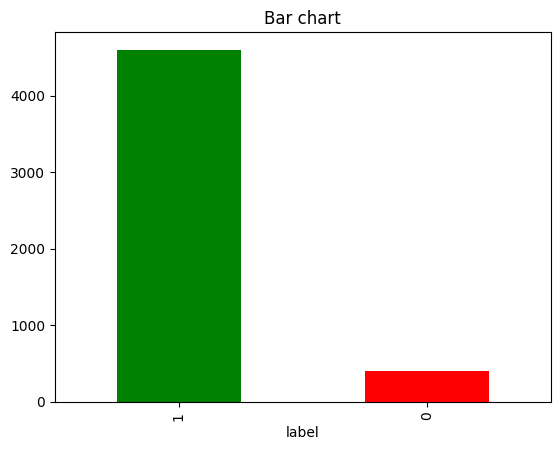

In [60]:
sentimen_data=pd.value_counts(data_label["label"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red"])
plt.title('Bar chart')
plt.show()

In [62]:
from wordcloud import WordCloud

In [63]:
train_s0 = data_label[data_label["label"] == 0]

In [64]:
train_s0["text_clean"] = train_s0["text_clean"].fillna("tidak ada komentar")

C:\Users\ACER\AppData\Local\Temp\ipykernel_9264\267362853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["text_clean"] = train_s0["text_clean"].fillna("tidak ada komentar")


In [65]:
train_s0

,product_name,category,text_clean,label
21,Alfalink EI 215 - Kamus Elektronik Alfalink EI...,elektronik,barang bagus sesuai pesan pesan warna biru war...,0
77,Alfalink EI 212 - Kamus Elektronik,elektronik,barang ok respon ok cuman lambat pengirimandil...,0
121,Alfalink EI 428 - Kamus Elektronik Electronic ...,elektronik,kamus terima kirim cepat fungsi materialkurang...,0
130,Alfalink EI 212 - Kamus Elektronik,elektronik,tombol rusak,0
150,Alfalink EI 212 - Kamus Elektronik,elektronik,barang okepelayanan primaaaaaaaaaa,0
...,...,...,...,...
4917,Staple/Stapel/Straples/Staples Nail &amp; paku...,pertukangan,harga susah dipakehehe staples nancep oenuh,0
4924,steples tembak / staples tembak kenmaster PROM...,pertukangan,fast respon barang sesuai gambar,0
4925,BESAR KENMASTER Staples Tembak Gun Staple Kenm...,pertukangan,terima barang sesuai harga,0
4938,Hekter Tembak / Staples / Guntacker,pertukangan,gagal,0


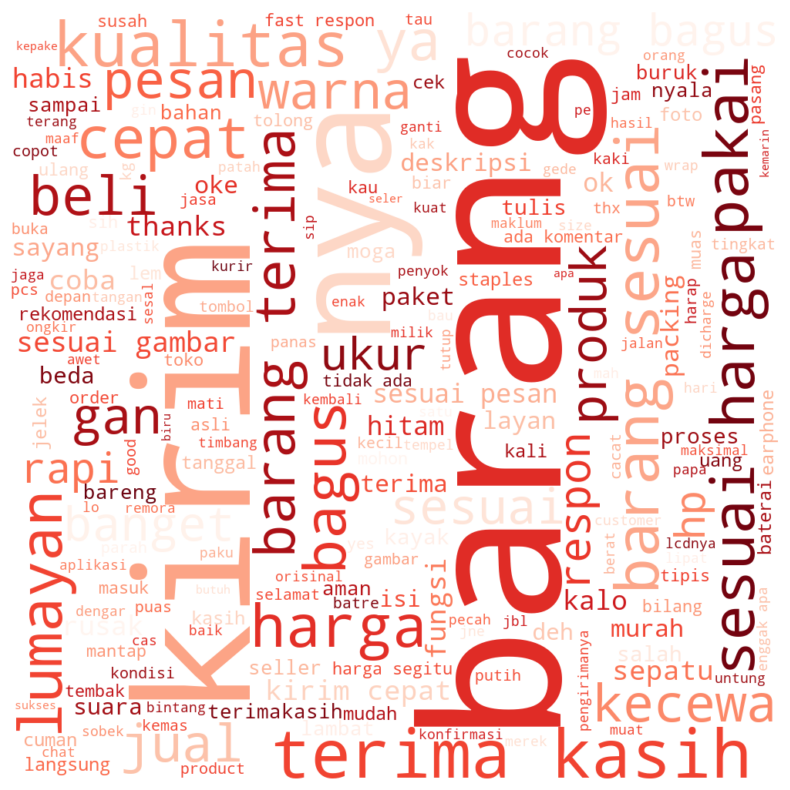

In [67]:
all_text_s0 = ' '.join(word for word in train_s0["text_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [68]:
train_s1 = data_label[data_label["label"] == 1]

In [69]:
train_s1["text_clean"] = train_s1["text_clean"].fillna("tidak ada komentar")

C:\Users\ACER\AppData\Local\Temp\ipykernel_9264\1482270195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["text_clean"] = train_s1["text_clean"].fillna("tidak ada komentar")


In [70]:
train_s1

,product_name,category,text_clean,label
0,Rexco 18 Contact Cleaner / Pembersih Komponen ...,elektronik,thanks,1
1,Alfalink EI 428 - Kamus Elektronik Electronic ...,elektronik,oke barang terima,1
2,Alfalink EI 212 - Kamus Elektronik,elektronik,bareng selamat gan terima kasih,1
3,TI-84 Plus CE,elektronik,cepat rekomendasi seller,1
4,Rexco 18 Contact Cleaner / Pembersih Komponen ...,elektronik,mantaf langsung test residu hilang kirim lamba...,1
...,...,...,...,...
4995,Staples Gun Tacker Mollar 3 in 1 / Staple Jok ...,pertukangan,terima kasih gan paket terima,1
4996,staples tembak HOMASTER / steples tembak / sta...,pertukangan,terimakasih kirim cepatdan barang sesuai,1
4997,staples tembak homaster / staple gun,pertukangan,terima kasih maaf konfirmasi,1
4998,staples tembak staple gun tacker staples jok m...,pertukangan,terima kasih packing rapi,1


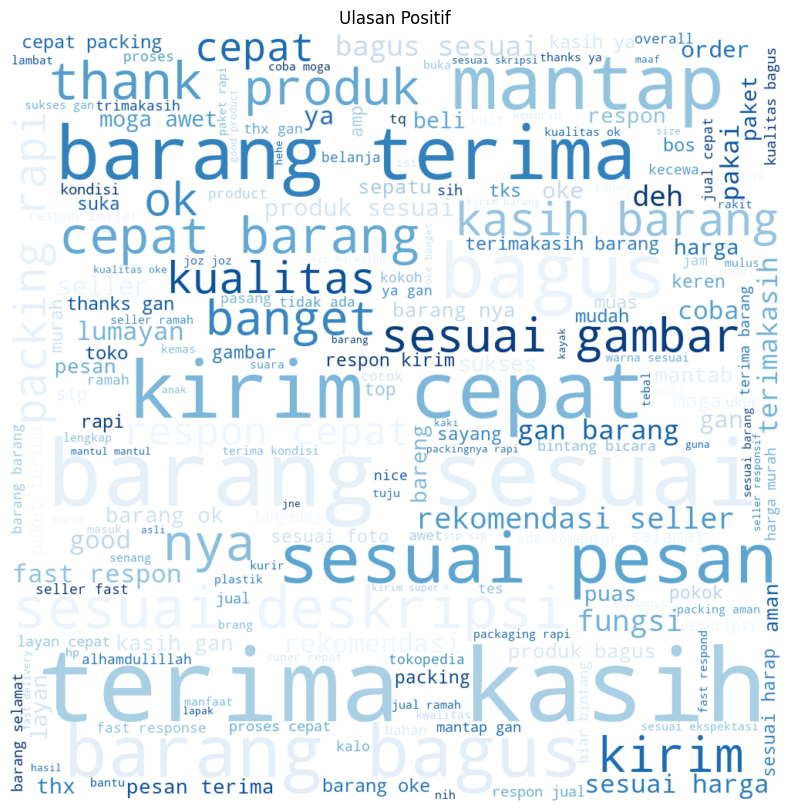

In [72]:
all_text_s1 = ' '.join(word for word in train_s1["text_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

In [73]:
data_label['text_clean'] = data_label['text_clean'].fillna("tidak ada komentar")

C:\Users\ACER\AppData\Local\Temp\ipykernel_9264\3954039041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['text_clean'] = data_label['text_clean'].fillna("tidak ada komentar")


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['text_clean'], data_label['label'], 
                                                    test_size=0.1, stratify=data_label['label'], random_state=30)

In [75]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [76]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(4500, 3424)
(500, 3424)


In [77]:
X_train = X_train.toarray()

In [78]:
X_test = X_test.toarray()

In [79]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [80]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 1.0}

In [81]:
nb = GaussianNB(var_smoothing=1.0)

In [82]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=1.0)

In [83]:
y_pred_nb = nb.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred_nb))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

--------------------- confusion matrix  ----------------------------
[[  0  40]
 [  0 460]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.92      1.00      0.96       460

    accuracy                           0.92       500
   macro avg       0.46      0.50      0.48       500
weighted avg       0.85      0.92      0.88       500



c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif